# Portfolio Choice 2

This notebook solves a portfolio optimization problem. The objective function of the investor trades off the portfolio expected return and variance. There are no restrictions on the portfolio weights, except that they must sum to 1 (across all assets, risky and riskfree).

## Load Packages and Extra Functions

In [1]:
using Printf, LinearAlgebra

include("src/printmat.jl");

In [2]:
using Plots
default(size = (480,320),fmt = :png)   #or :svg

# From Chapter on Mean-Variance Analysis

The file included below contains functions from the chapter on MV analysis, in particular, ` MVTangencyP()` which calculates the tangency portfolio,
`MVCalc()` which calculates the MV frontier from risky assets, and `MVCalcRf()` which does the same but from both risky assets and a riskfree asset. 

In [3]:
include("src/MvCalculations.jl");

# Optimal Portfolio Choice: A Risky and a Riskfree Asset

Consider the objective function ("utility") $\text{E}R_p - k/2\times \text{Var}(R_p)$.

It depends on the weight $v$ on the risky asset (and $1-v$ on the riskfree asset), since both terms do (see the previous cells).

The optimal portfolio weight is 

$v = \frac{\mu^e}{k\sigma^2}$

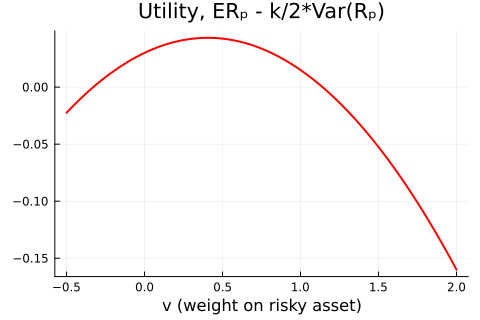

In [4]:
μ  = 9.5/100  #expected return of the risky asset
σ  = 8/100    #std of the risky asset
Rf = 3/100    #risk free return (interest rate)

k  = 25       #risk aversion
μᵉ = μ - Rf   #expected excess return

v_range = range(-0.5,2,length=101)          #trying different portfolio weights
ERₚ     = v_range*μᵉ .+ Rf                  #a vector of the same length as v_range
VarRₚ   = v_range.^2*σ^2                    #v_range.^2 to square each element of v_range
Util    = ERₚ - k/2*VarRₚ

p1 = plot( v_range,Util,
           linecolor = :red,
           linewidth = 2,
           legend = false,
           title = "Utility, ERₚ - k/2*Var(Rₚ)",
           xlabel = "v (weight on risky asset)" )
display(p1)

In [5]:
vopt = μᵉ/(k*σ^2)       #optimal solution (according to the lecture notes)

printblue("Optimal weights on risky and riskfree assets when k = $k: ")
printmat([vopt,1-vopt];rowNames=["Risky","Riskfree"])

printred("compare with the figure")

Optimal weights on risky and riskfree assets when k = 25: 
Risky        0.406
Riskfree     0.594

compare with the figure


# Optimal Portfolio Choice: Several Risky Assets and a Riskfree

An investor who maximizes

$\text{E}R_{p}-\frac{k}{2} \text{Var}(R_{p})$,

subject to 

$R_{p} = v'R^e + R_f$

will pick the portfolio weights (on the risky assets)

$v  =\frac{1}{k}\Sigma^{-1}\mu^{e}$

The portfolio weight on the riskfree asset is $1-\mathbf{1}'v$

In [6]:
"""
Calculate optimal portfolio weights
"""
function OptimalPortfolio(μ,Σ,Rf,k)
    μᵉ    = μ .- Rf             #expected excess returns
    v     = inv(Σ) * μᵉ/k       #optimal weights risky assets, 1-sum(v) in riskfree
    ERp   = v'μᵉ .+ Rf          #expected return and std of optimal portfolio
    StdRp = sqrt(v'Σ*v)
    return v,ERp,StdRp
end

OptimalPortfolio

In [7]:
"""
    μΣRf(TwoAssets=true)

The parameter values for the 2- and 3-asset examples
"""
function μΣRf(TwoAssets=true)
    if TwoAssets
        μ  = [8.5, 6.5]/100             #means, μₐ to indicate that this is case a
        Σ  = [166  34;                  #covariance matrix
               34  64]/100^2
        rowNames = ["Asset 1","Asset 2"]
    else    
        μ = [11.5, 9.5, 6]/100
        Σ = [166  34  58;
              34  64   4;
              58   4 100]/100^2
    rowNames = ["Asset A","Asset B","Asset C"]        
    end
    Rf = 3/100                     #riskfree rate    
    return μ, Σ, Rf, rowNames
end;

## An Example with 2 Risky Assets and a Riskfree Asset

We first solve an example with 2 risky assets and a riskfree asset. In this case, we can plot how the objective function depends on the portfolio weights.

In [8]:
(μ,Σ,Rf,rowNames) = μΣRf(true)    #parameter values, two assets
μᵉ = μ .- Rf;                     #average excess returns  

#println("μ*100 and Σ*100^2")
#printmat(μ*100)
#printmat(Σ*10_000)

In [9]:
k = 9

(n₁,n₂)  = (21,23)
v₁_range = range(-0.5,1.5,length=n₁)    #portfolio weights asset 1
v₂_range = range(-0.5,1.5,length=n₂)    # ""                     2

Util = fill(NaN,n₁,n₂)
for i in 1:n₁, j in 1:n₂       #loop across portfolio weights
    #local v                   #local/global is needed in script
    v         = [v₁_range[i];v₂_range[j]]
    Util[i,j] = v'μᵉ + Rf - (k/2)*v'Σ*v
end

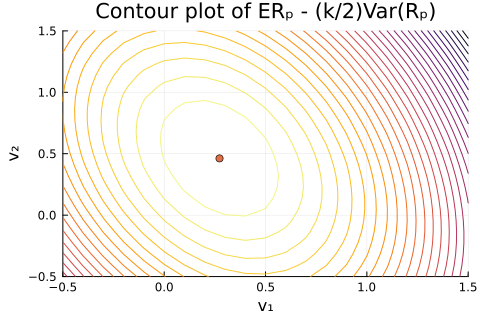

In [10]:
p1 = contour( v₁_range,v₂_range,Util',         #notice the transpose
              xlims = (-0.5,1.5),
              ylims = (-0.5,1.5),
              legend = false,
              levels = 31,
              title = "Contour plot of ERₚ - (k/2)Var(Rₚ)",
              xlabel = "v₁",
              ylabel = "v₂")
scatter!([0.273],[0.462])
display(p1)

The next cell calls on `OptimalPortfolio()` to calculate the optimal weights - and also compares with the tangency portfolio.

In [11]:
vOpt, = OptimalPortfolio(μ,Σ,Rf,k)         #find optimal portfolio

printblue("optimal portfolio weights on risky assets and riskfree when k = $k:")
printmat([vOpt;(1-sum(vOpt))];rowNames=[rowNames;"Riskfree"])

optimal portfolio weights on risky assets and riskfree when k = 9:
Asset 1      0.273
Asset 2      0.462
Riskfree     0.264



# Interpreting the First Order Conditions (extra)

The first order conditions for optimal portfolio choice are 

$\mu^e = k \Sigma v$

Notice that $\Sigma v$ is a vector of covariances of each asset with the portfolio $v$.

The next cell shows what happens to the first order condition at/off the optimal choice of $v$.

In [12]:
(μ,Σ,Rf,rowNames) = μΣRf(true)    #parameter values, two assets
μᵉ = μ .- Rf 

v, = OptimalPortfolio(μ,Σ,Rf,k)         #find optimal portfolio
printblue("Checking the first order conditions at optimal v:")
printmat(v,μᵉ,k*Σ*v;colNames=["v","μᵉ","kΣv"],rowNames)

v   = [0.10,vOpt[2]]            #lower v₁, same v₂
printblue("Checking the first order conditions at another v (lower v₁, same v₂):")
printmat(v,μᵉ,k*Σ*v;colNames=["v","μᵉ","kΣv"],rowNames)

printmagenta("the difference between μᵉ and kΣv now suggests that we should increase v₁")

Checking the first order conditions at optimal v:
                v        μᵉ       kΣv
Asset 1     0.273     0.055     0.055
Asset 2     0.462     0.035     0.035

Checking the first order conditions at another v (lower v₁, same v₂):
                v        μᵉ       kΣv
Asset 1     0.100     0.055     0.029
Asset 2     0.462     0.035     0.030

the difference between μᵉ and kΣv now suggests that we should increase v₁


## MV Preferences Give a Portfolio on the MV Frontier

...illustrated by a case with three risky assets and a riskfree. We also compare the optimal portfolios for different investors (with different risk aversions).

We then show that the optimal portfolios are on the mean-variance frontier.

In [13]:
(μ,Σ,Rf,rowNames) = μΣRf(false)             #parameter values, 3 assets
μᵉ = μ .- Rf        

(vD,muD,StdD) = OptimalPortfolio(μ,Σ,Rf,28)        #high risk aversion
(vE,muE,StdE) = OptimalPortfolio(μ,Σ,Rf,8.8)       #low risk aversion

(wT,muT,StdT) = MVTangencyP(μ,Σ,Rf)                #tangency portfolio

printblue("optimal portfolio weights:")
printmat([vD;(1-sum(vD))],[vE;(1-sum(vE))];colNames=["D (high k)","E (low k)"],rowNames=[rowNames;"Riskfree"])

printblue("optimal weights/tangency portfolio:")
printmat(vD./wT,vE./wT;colNames=["D (high k)","E (low k)"],rowNames)

printblue("optimal portfolios are effectively c*tangency portfolio (+ a position in the riskfree)")

optimal portfolio weights:
        D (high k) E (low k)
Asset A      0.110     0.350
Asset B      0.302     0.962
Asset C      0.031     0.099
Riskfree     0.556    -0.411

optimal weights/tangency portfolio:
       D (high k) E (low k)
Asset A     0.444     1.411
Asset B     0.444     1.411
Asset C     0.444     1.411

optimal portfolios are effectively c*tangency portfolio (+ a position in the riskfree)


In [14]:
L = 101
μstar_range = range(Rf,0.15,length=L)

StdRₚ = fill(NaN,L,2)                 #loop over required average returns (μstar)
for i in 1:L
    StdRₚ[i,1] = MVCalc(  μstar_range[i],μ,Σ)[1]         #risky only
    StdRₚ[i,2] = MVCalcRf(μstar_range[i],μ,Σ,Rf)[1]      #risky and riskfree
end

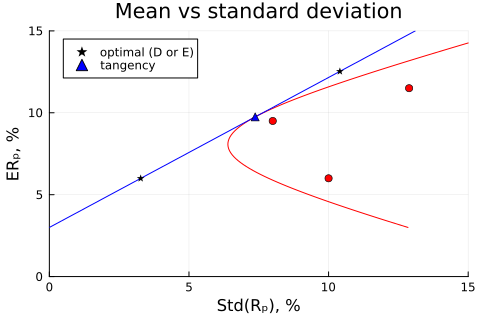

In [15]:
p1 = plot( StdRₚ*100,μstar_range*100,
           label = "",
           linecolor = [:red :blue],
           xlim = (0,15),
           ylim = (0,15),
           title = "Mean vs standard deviation",
           xlabel = "Std(Rₚ), %",
           ylabel = "ERₚ, %" )
scatter!(sqrt.(diag(Σ))*100,μ*100,color=:red,label="")
scatter!([StdD,StdE]*100,[muD,muE]*100,color=:black,marker=:star,label="optimal (D or E)")
scatter!([StdT]*100,[muT]*100,color=:blue,marker=:utriangle,label="tangency",legend=:topleft)
display(p1)